In [1]:
"""IMPORTS (ONLY ONCE)"""

'IMPORTS (ONLY ONCE)'

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


In [3]:
"""LOAD DATA"""

'LOAD DATA'

In [4]:
train = pd.read_csv("train.csv", parse_dates=["Datum"])
wetter = pd.read_csv("wetter.csv", parse_dates=["Datum"])
kiwo = pd.read_csv("kiwo.csv", parse_dates=["Datum"])


In [5]:
"""first look """

'first look '

In [6]:
train.head()


,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.83
1,1307021,2013-07-02,1,159.79
2,1307031,2013-07-03,1,111.89
3,1307041,2013-07-04,1,168.86
4,1307051,2013-07-05,1,171.28


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           9334 non-null   int64         
 1   Datum        9334 non-null   datetime64[ns]
 2   Warengruppe  9334 non-null   int64         
 3   Umsatz       9334 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 291.8 KB


In [8]:
train.describe()


,id,Datum,Warengruppe,Umsatz
count,"9,334.00",9334,"9,334.00","9,334.00"
mean,"1,559,311.25",2016-01-13 23:56:27.100921344,3.09,206.75
min,"1,307,011.00",2013-07-01 00:00:00,1.00,7.05
25%,"1,410,123.25",2014-10-12 00:00:00,2.00,96.90
50%,"1,601,102.50",2016-01-10 00:00:00,3.00,161.90
75%,"1,704,222.75",2017-04-22 00:00:00,4.00,280.64
max,"1,807,315.00",2018-07-31 00:00:00,6.00,"1,879.46"
std,"151,250.25",NaN,1.49,144.55


In [9]:
"""first look wetter"""

'first look wetter'

In [10]:
wetter.head()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.00,9.82,14,58.00
1,2012-01-02,7.00,7.44,12,NaN
2,2012-01-03,8.00,5.54,18,63.00
3,2012-01-04,4.00,5.69,19,80.00
4,2012-01-05,6.00,5.30,23,80.00


In [11]:
wetter.describe()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,2601,"2,591.00","2,601.00","2,601.00","1,932.00"
mean,2015-12-07 00:08:18.269896192,4.81,12.10,11.19,37.48
min,2012-01-01 00:00:00,0.00,-10.25,3.00,0.00
25%,2014-03-14 00:00:00,3.00,6.51,8.00,10.00
50%,2015-12-24 00:00:00,6.00,12.00,10.00,28.00
75%,2017-10-07 00:00:00,7.00,17.82,14.00,61.00
max,2019-08-01 00:00:00,8.00,32.67,35.00,95.00
std,NaN,2.58,7.17,4.12,27.57


In [12]:
wetter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datum                2601 non-null   datetime64[ns]
 1   Bewoelkung           2591 non-null   float64       
 2   Temperatur           2601 non-null   float64       
 3   Windgeschwindigkeit  2601 non-null   int64         
 4   Wettercode           1932 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 101.7 KB


In [13]:
""" first look kiwo"""

' first look kiwo'

In [14]:
kiwo.head()

,Datum,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1


In [15]:
kiwo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datum        72 non-null     datetime64[ns]
 1   KielerWoche  72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [16]:
kiwo.describe()

,Datum,KielerWoche
count,72,72.00
mean,2015-12-23 00:00:00,1.00
min,2012-06-16 00:00:00,1.00
25%,2014-03-24 00:00:00,1.00
50%,2015-12-23 00:00:00,1.00
75%,2017-09-22 00:00:00,1.00
max,2019-06-30 00:00:00,1.00
std,NaN,0.00


In [17]:
"""DISTRIBUTION OF PRODUCT GROUPS"""

'DISTRIBUTION OF PRODUCT GROUPS'

In [18]:
train["Warengruppe"].value_counts().sort_index()


Warengruppe
1    1819
2    1819
3    1819
4    1766
5    1819
6     292
Name: count, dtype: int64

In [19]:
"""TOTAL REVENUE PER DAY
"""

'TOTAL REVENUE PER DAY\n'

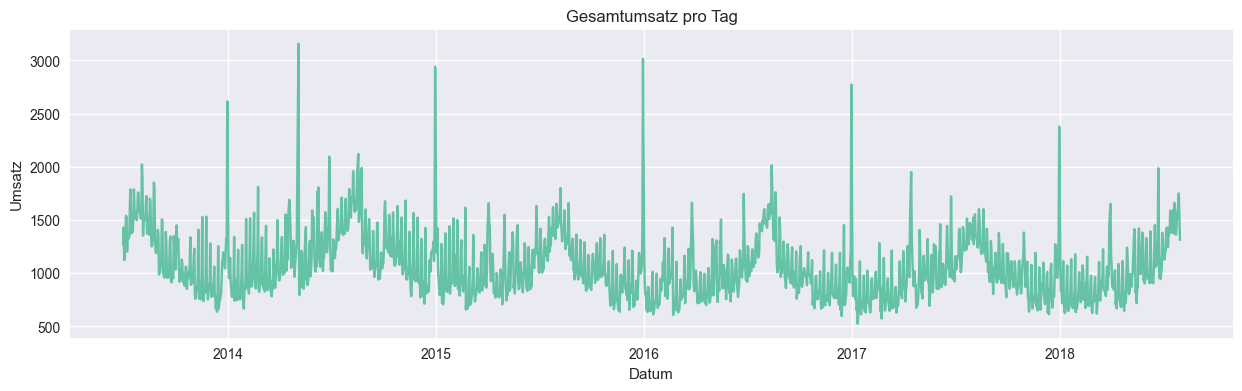

In [20]:
tagesumsatz = train.groupby("Datum")["Umsatz"].sum()

plt.figure(figsize=(15,4))
plt.plot(tagesumsatz)
plt.title("Gesamtumsatz pro Tag")
plt.xlabel("Datum")
plt.ylabel("Umsatz")
plt.show()


In [21]:
"""TURNOVER PER PRODUCT GROUP OVER TIME"""

'TURNOVER PER PRODUCT GROUP OVER TIME'

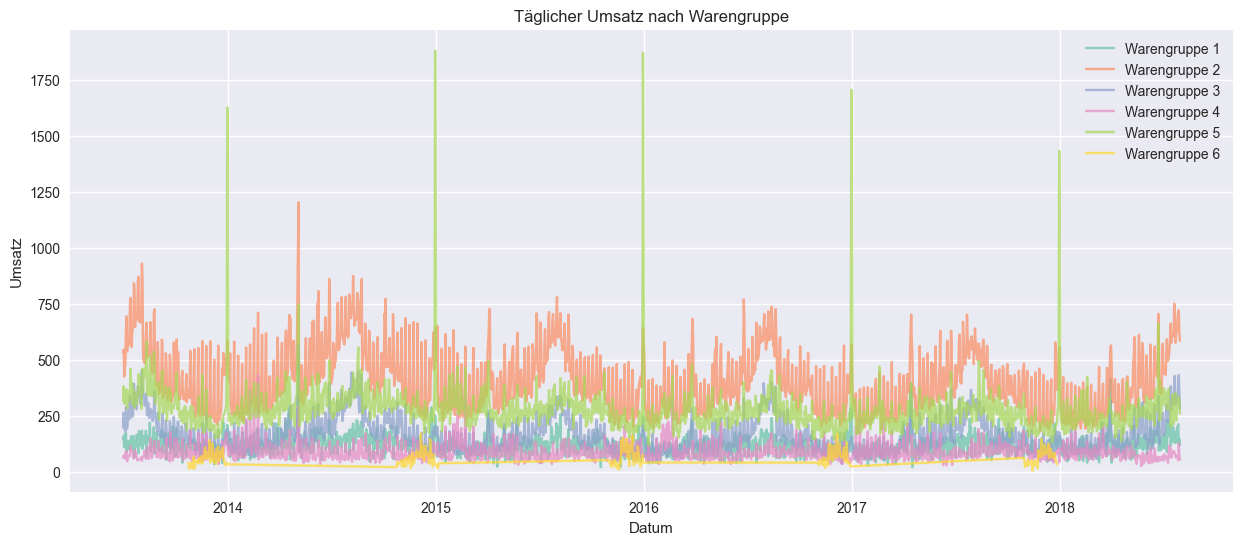

In [22]:
plt.figure(figsize=(15,6))

for wg in sorted(train["Warengruppe"].unique()):
    subset = train[train["Warengruppe"] == wg]
    plt.plot(subset["Datum"], subset["Umsatz"], label=f"Warengruppe {wg}", alpha=0.7)

plt.legend()
plt.title("Täglicher Umsatz nach Warengruppe")
plt.xlabel("Datum")
plt.ylabel("Umsatz")
plt.show()


In [23]:
"""DISTRIBUTION OF SALES (GLOBAL)"""

'DISTRIBUTION OF SALES (GLOBAL)'

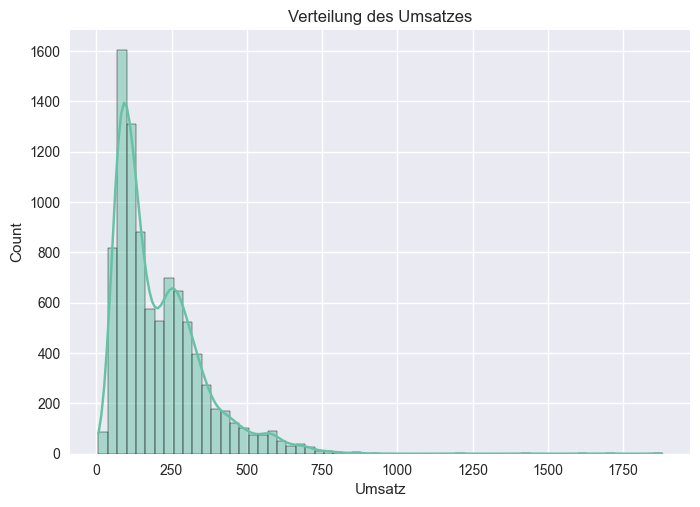

In [24]:
sns.histplot(train["Umsatz"], bins=60, kde=True)
plt.title("Verteilung des Umsatzes")
plt.show()


In [25]:
"""DISTRIBUTION OF TURNOVER BY PRODUCT GROUP"""

'DISTRIBUTION OF TURNOVER BY PRODUCT GROUP'

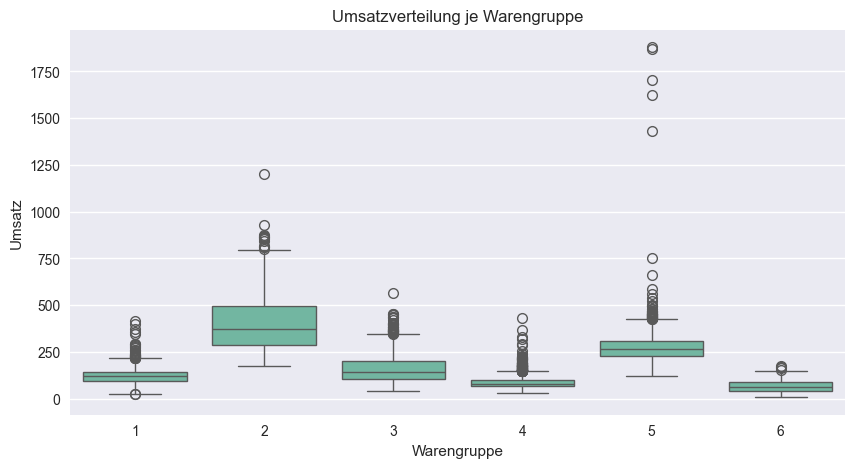

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Warengruppe", y="Umsatz", data=train)
plt.title("Umsatzverteilung je Warengruppe")
plt.show()


In [27]:
"""CALENDAR FEATURES (EDA ONLY)"""

'CALENDAR FEATURES (EDA ONLY)'

In [28]:
train["Wochentag"] = train["Datum"].dt.dayofweek
train["Monat"] = train["Datum"].dt.month
train["Jahr"] = train["Datum"].dt.year
train["Wochenende"] = train["Wochentag"].isin([5,6]).astype(int)


In [29]:
"""WEEKDAY EFFECT"""

'WEEKDAY EFFECT'

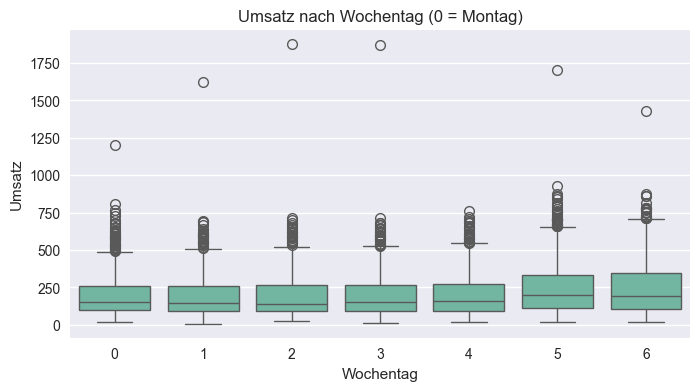

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Wochentag", y="Umsatz", data=train)
plt.title("Umsatz nach Wochentag (0 = Montag)")
plt.show()


In [31]:
"""MONTHLY SEASONALITY'"""

"MONTHLY SEASONALITY'"

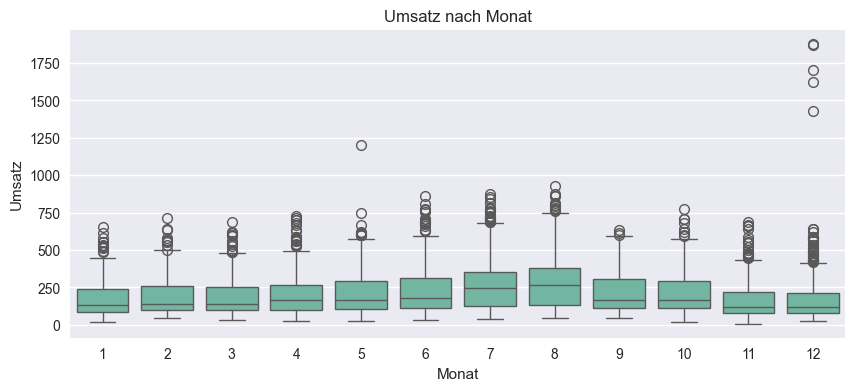

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(x="Monat", y="Umsatz", data=train)
plt.title("Umsatz nach Monat")
plt.show()


In [33]:
"""KIEL WEEK (KIWO)"""

'KIEL WEEK (KIWO)'

In [34]:
train = train.merge(
    kiwo.assign(KiWo=1),
    on="Datum",
    how="left"
)

train["KiWo"] = train["KiWo"].fillna(0)


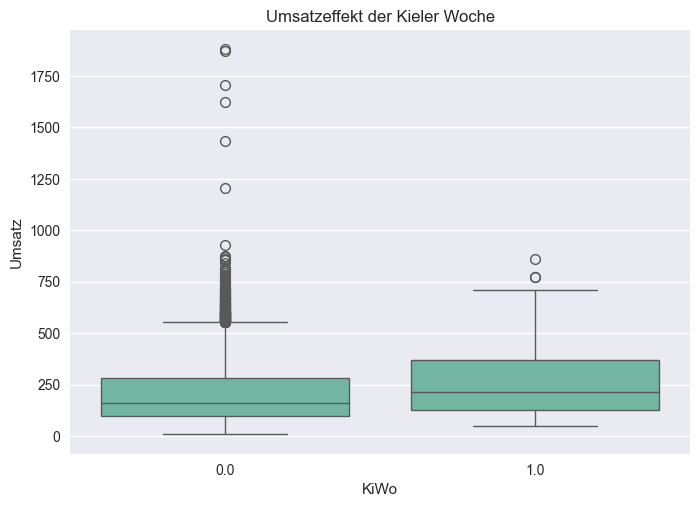

In [35]:
sns.boxplot(x="KiWo", y="Umsatz", data=train)
plt.title("Umsatzeffekt der Kieler Woche")
plt.show()


In [36]:
"""KIWO EFFECT PER PRODUCT GROUP"""

'KIWO EFFECT PER PRODUCT GROUP'

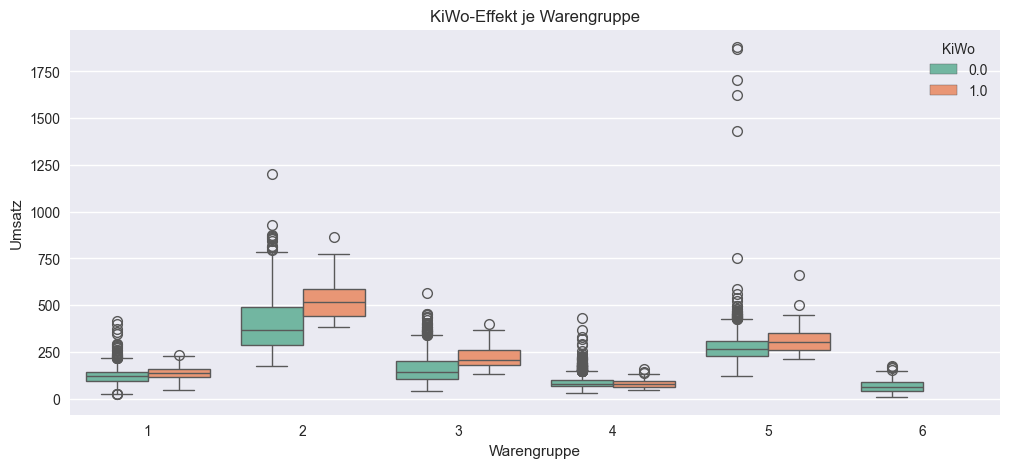

In [37]:
plt.figure(figsize=(12,5))
sns.boxplot(
    x="Warengruppe",
    y="Umsatz",
    hue="KiWo",
    data=train
)
plt.title("KiWo-Effekt je Warengruppe")
plt.show()


In [38]:
"""WEATHER DATA MERGEN"""

'WEATHER DATA MERGEN'

In [39]:
train_wetter = train.merge(wetter, on="Datum", how="left")


In [40]:
train_wetter.isna().mean()


id                    0.00
Datum                 0.00
Warengruppe           0.00
Umsatz                0.00
Wochentag             0.00
Monat                 0.00
Jahr                  0.00
Wochenende            0.00
KielerWoche           0.98
KiWo                  0.00
Bewoelkung            0.01
Temperatur            0.00
Windgeschwindigkeit   0.00
Wettercode            0.25
dtype: float64

In [41]:
"""TEMPERATURE VS. REVENUE"""

'TEMPERATURE VS. REVENUE'

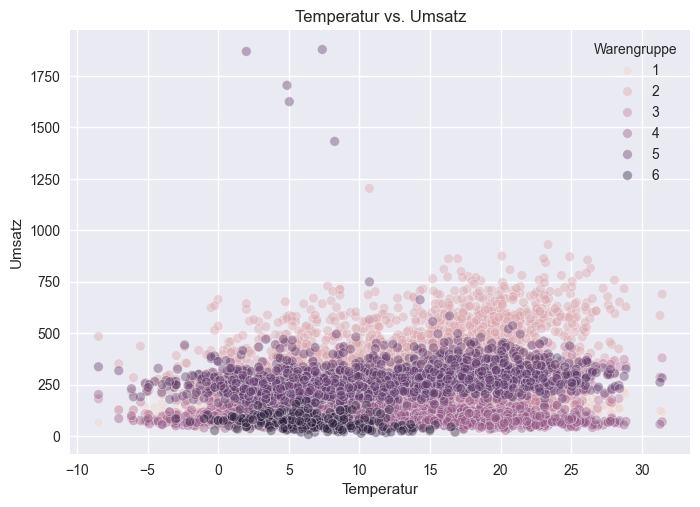

In [42]:
sns.scatterplot(
    data=train_wetter,
    x="Temperatur",
    y="Umsatz",
    hue="Warengruppe",
    alpha=0.4
)
plt.title("Temperatur vs. Umsatz")
plt.show()


In [43]:
"""BEWÖLKUNG VS. UMSATZ"""

'BEWÖLKUNG VS. UMSATZ'

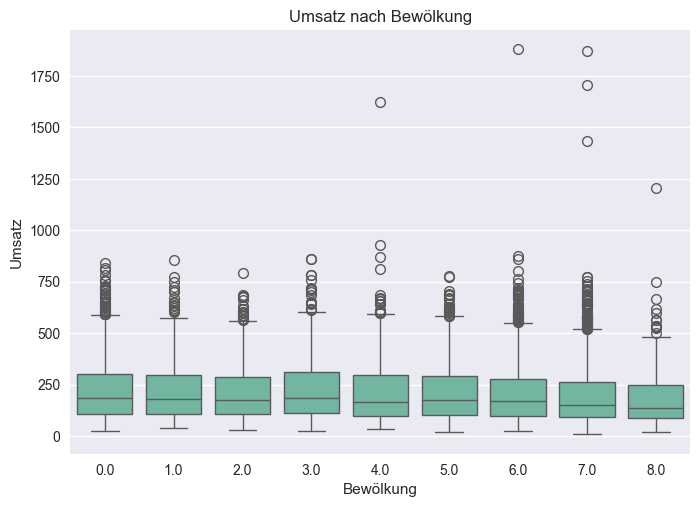

In [44]:
sns.boxplot(
    x="Bewoelkung",
    y="Umsatz",
    data=train_wetter
)
plt.title("Umsatz nach Bewölkung")
plt.xlabel("Bewölkung")
plt.ylabel("Umsatz")
plt.show()


In [45]:
"""WINDGESCHWINDIGKEIT VS. UMSATZ"""

'WINDGESCHWINDIGKEIT VS. UMSATZ'

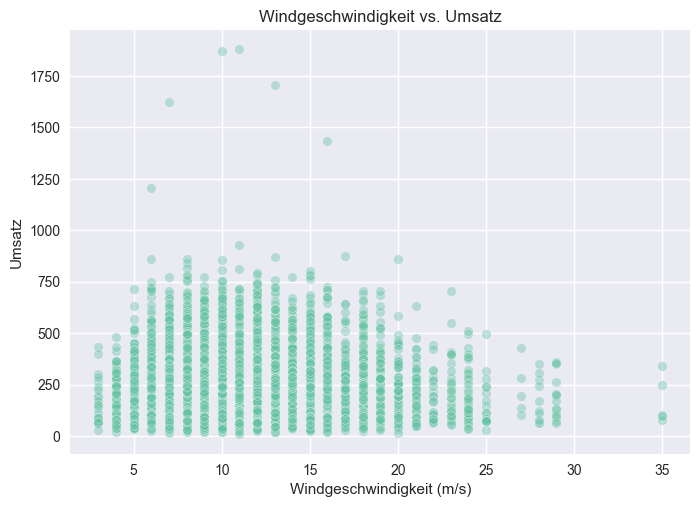

In [46]:
sns.scatterplot(
    data=train_wetter,
    x="Windgeschwindigkeit",
    y="Umsatz",
    alpha=0.4
)
plt.title("Windgeschwindigkeit vs. Umsatz")
plt.xlabel("Windgeschwindigkeit (m/s)")
plt.ylabel("Umsatz")
plt.show()


In [47]:
"""WETTERCODE VS. UMSATZ"""

'WETTERCODE VS. UMSATZ'

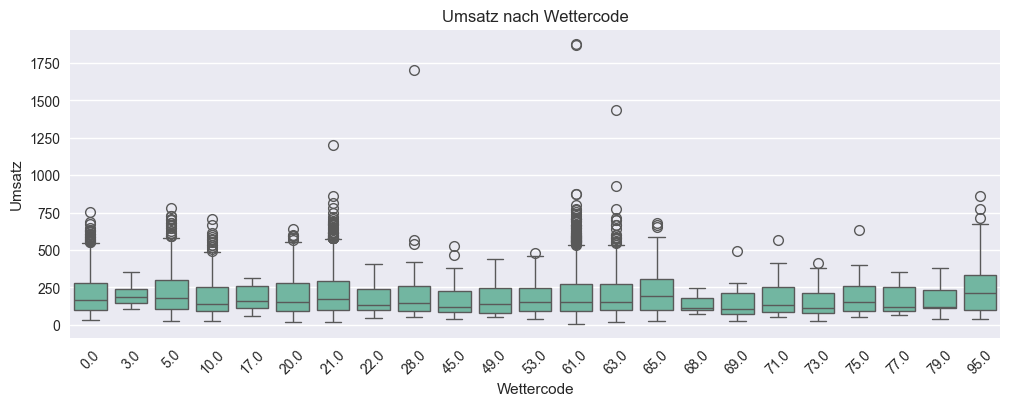

In [48]:
plt.figure(figsize=(12,4))
sns.boxplot(
    x="Wettercode",
    y="Umsatz",
    data=train_wetter
)
plt.xticks(rotation=45)
plt.title("Umsatz nach Wettercode")
plt.show()


In [49]:
"""GROUP WEATHER CODE (EDA HELP)"""

'GROUP WEATHER CODE (EDA HELP)'

In [50]:
def wetter_gruppe(code):
    if code in [0, 1]:
        return "Sonne"
    elif code in [2, 3]:
        return "Bewölkt"
    elif code in [4, 5, 6]:
        return "Regen"
    elif code in [7]:
        return "Schnee"
    else:
        return "Sonstiges"

train_wetter["Wettergruppe"] = train_wetter["Wettercode"].apply(wetter_gruppe)


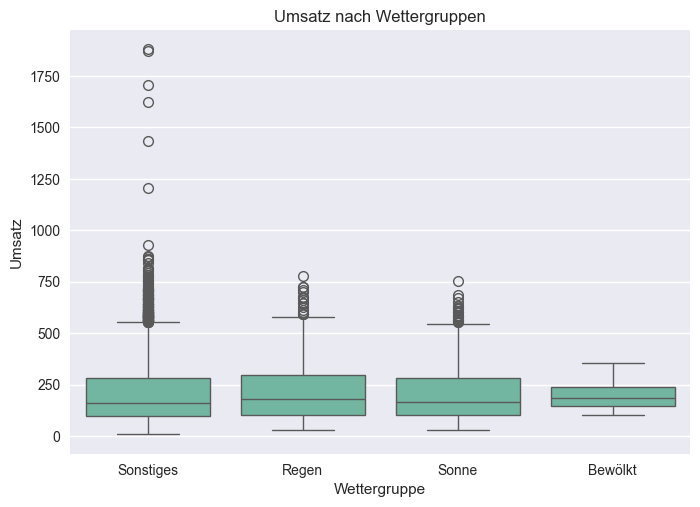

In [51]:
sns.boxplot(
    x="Wettergruppe",
    y="Umsatz",
    data=train_wetter
)
plt.title("Umsatz nach Wettergruppen")
plt.show()


In [52]:
"""WEATHER × PRODUCT GROUP"""

'WEATHER × PRODUCT GROUP'

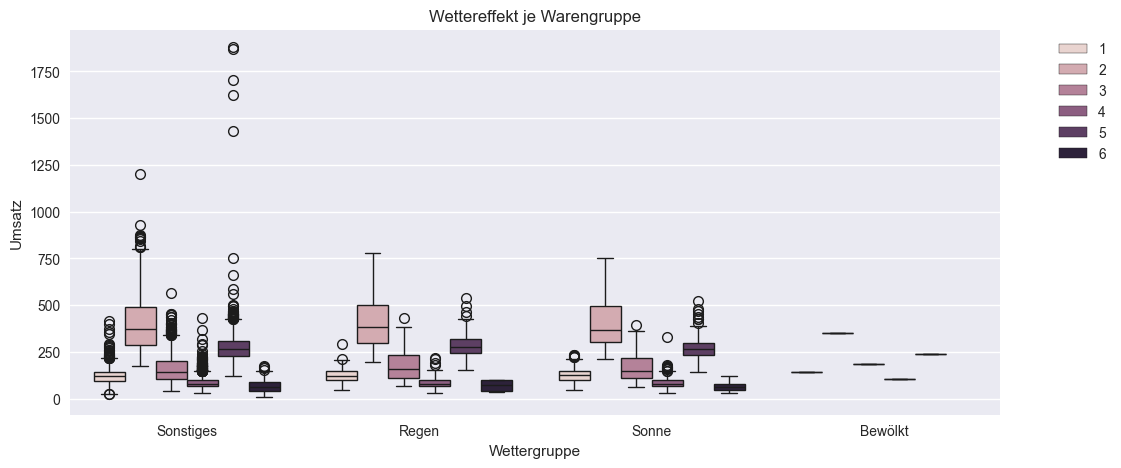

In [53]:
plt.figure(figsize=(12,5))
sns.boxplot(
    x="Wettergruppe",
    y="Umsatz",
    hue="Warengruppe",
    data=train_wetter
)
plt.title("Wettereffekt je Warengruppe")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [54]:
"""NUMERICAL CORRELATIONS"""

'NUMERICAL CORRELATIONS'

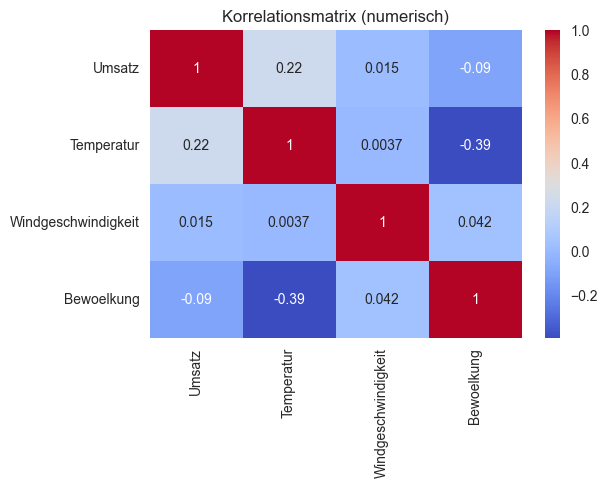

In [55]:
num_cols = [
    "Umsatz",
    "Temperatur",
    "Windgeschwindigkeit",
    "Bewoelkung"
]

corr = train_wetter[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korrelationsmatrix (numerisch)")
plt.show()


In [56]:
"""confidence interval"""

'confidence interval'

In [59]:
umsatz = train["Umsatz"]

mean_umsatz = umsatz.mean()
std_umsatz = umsatz.std()
n = len(umsatz)

confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)

margin_error = z * (std_umsatz / np.sqrt(n))

ci_lower = mean_umsatz - margin_error
ci_upper = mean_umsatz + margin_error

mean_umsatz, ci_lower, ci_upper


(np.float64(206.74904447892774),
 np.float64(203.81668078905915),
 np.float64(209.68140816879634))

In [60]:
"""CONFIDENCE INTERVAL (Mean Umsatz)"""

'CONFIDENCE INTERVAL (Mean Umsatz)'

In [61]:
umsatz = train["Umsatz"]

mean_umsatz = umsatz.mean()
std_umsatz = umsatz.std()
n = len(umsatz)

confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)

margin_error = z * (std_umsatz / np.sqrt(n))

ci_lower = mean_umsatz - margin_error
ci_upper = mean_umsatz + margin_error

mean_umsatz, ci_lower, ci_upper


(np.float64(206.74904447892774),
 np.float64(203.81668078905915),
 np.float64(209.68140816879634))

In [62]:
"""ONE-SAMPLE t-TEST"""

'ONE-SAMPLE t-TEST'

In [63]:
t_stat, p_value = stats.ttest_1samp(train["Umsatz"], 200)
t_stat, p_value


(np.float64(4.5109971025967885), np.float64(6.531206925344623e-06))

In [64]:
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")


Reject H0


In [66]:
"""TWO-SAMPLE t-TEST (Kieler Woche)"""

'TWO-SAMPLE t-TEST (Kieler Woche)'

In [67]:
kiwo_sales = train[train["KiWo"] == 1]["Umsatz"]
normal_sales = train[train["KiWo"] == 0]["Umsatz"]

t_stat, p_value = stats.ttest_ind(
    kiwo_sales,
    normal_sales,
    equal_var=False
)

t_stat, p_value


(np.float64(4.613680085341751), np.float64(6.582882820068423e-06))

In [68]:
"""CONFIDENCE INTERVAL (Difference in Means)"""

'CONFIDENCE INTERVAL (Difference in Means)'

In [69]:
mean_diff = kiwo_sales.mean() - normal_sales.mean()

se_diff = np.sqrt(
    kiwo_sales.var() / len(kiwo_sales) +
    normal_sales.var() / len(normal_sales)
)

ci_lower = mean_diff - 1.96 * se_diff
ci_upper = mean_diff + 1.96 * se_diff

mean_diff, ci_lower, ci_upper


(np.float64(55.127227702341514),
 np.float64(31.707882559648162),
 np.float64(78.54657284503486))

In [70]:
"""CORRELATION TEST (Temperatur vs Umsatz)"""

'CORRELATION TEST (Temperatur vs Umsatz)'

In [71]:
corr, p_value = stats.pearsonr(
    train_wetter["Temperatur"],
    train_wetter["Umsatz"]
)

corr, p_value


(np.float64(nan), np.float64(nan))

In [72]:
"""SPEARMAN CORRELATION (Non-linear / Robust)"""

'SPEARMAN CORRELATION (Non-linear / Robust)'

In [73]:
corr, p_value = stats.spearmanr(
    train_wetter["Temperatur"],
    train_wetter["Umsatz"]
)

corr, p_value


(nan, nan)

In [74]:
"""ANOVA (Multiple Groups)"""

'ANOVA (Multiple Groups)'

In [75]:
groups = [
    train[train["Warengruppe"] == wg]["Umsatz"]
    for wg in train["Warengruppe"].unique()
]

f_stat, p_value = stats.f_oneway(*groups)
f_stat, p_value


(np.float64(3384.419914201926), np.float64(0.0))

In [76]:
"""NON-PARAMETRIC TEST (Mann–Whitney U)"""

'NON-PARAMETRIC TEST (Mann–Whitney U)'

In [77]:
u_stat, p_value = stats.mannwhitneyu(
    kiwo_sales,
    normal_sales,
    alternative="two-sided"
)

u_stat, p_value


(np.float64(1194816.0), np.float64(6.765429762245561e-06))

In [78]:
"""NORMALITY TEST (Shapiro–Wilk)"""

'NORMALITY TEST (Shapiro–Wilk)'

In [79]:
stat, p_value = stats.shapiro(train["Umsatz"].sample(500))
stat, p_value


(np.float64(0.8060586048907242), np.float64(4.909399697456728e-24))

In [80]:
"""If p < 0.05 → variances differ → Welch t-test justified"""

'If p < 0.05 → variances differ → Welch t-test justified'

In [81]:
"""EFFECT SIZE (Cohen’s d)"""

'EFFECT SIZE (Cohen’s d)'

In [82]:
mean1, mean2 = kiwo_sales.mean(), normal_sales.mean()
std1, std2 = kiwo_sales.std(), normal_sales.std()

pooled_std = np.sqrt((std1**2 + std2**2) / 2)

cohens_d = (mean1 - mean2) / pooled_std
cohens_d


np.float64(0.3422043294304224)